# 4.1 Contorns

Ara que ja sabem detectar objectes, és hora de delimitar-los amb un **contorn** per poder analitzar-los en profunditat i determinar quin objecte hem detectat.

La detecció de contorns és de gran importància en el processament d’imatges, no sols per reconèixer objectes, sinó també per delimitar regions. 

Però, què és un contorn? Seguint la definició que trobem en el [tutorial de l'openCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html), un contorn és una línea corba que uneix tots els punts consecutius que rodegen un objecte determinat, o en altres paraules, un contorn és la línia que marca la frontera entre l'objecte i el fons de la imatge.

## Detecció de Contorns
La detecció de contorns ens permet aïllar els objectes del fons.

OpenCV ens permet trobar i dibuixar contorns de manera bastant automàtica, però hem de tenir en compte que existeixen diversos algoritmes i funcions per detectar contorns i característiques dels objectes. Depenent de la imatge i dels objectes que vulguem detectar, ens anirà millor un algoritme o altre. 

També hem de tenir en compte que la detecció de contorns en OpenCV es fa sobre imatges binàries, és a dir que en la majoria de casos es detecten objectes blancs sobre fons negre. I, també, que moltes de les funcions per detectar i dibuixar contorns modifiquen la imatge original (com per exemple findContours), així que si volem mantenir una còpia de la imatge de la imatge original haurem de desar-ne una còpia expressament abans de començar els canvis.

MIREIA: Explicar que podem detectar contorns aplicant diferents matrius de convolució: Sobel, Laplacian, etc:
            
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html
                
                
Veiem un exemple amb OpenCV i Python per detectar i dibuixar els contorns.



Text(0.5,1,'X + Y')

Text(0.5,1,'Vertical')

Text(0.5,1,'Horitzontal')

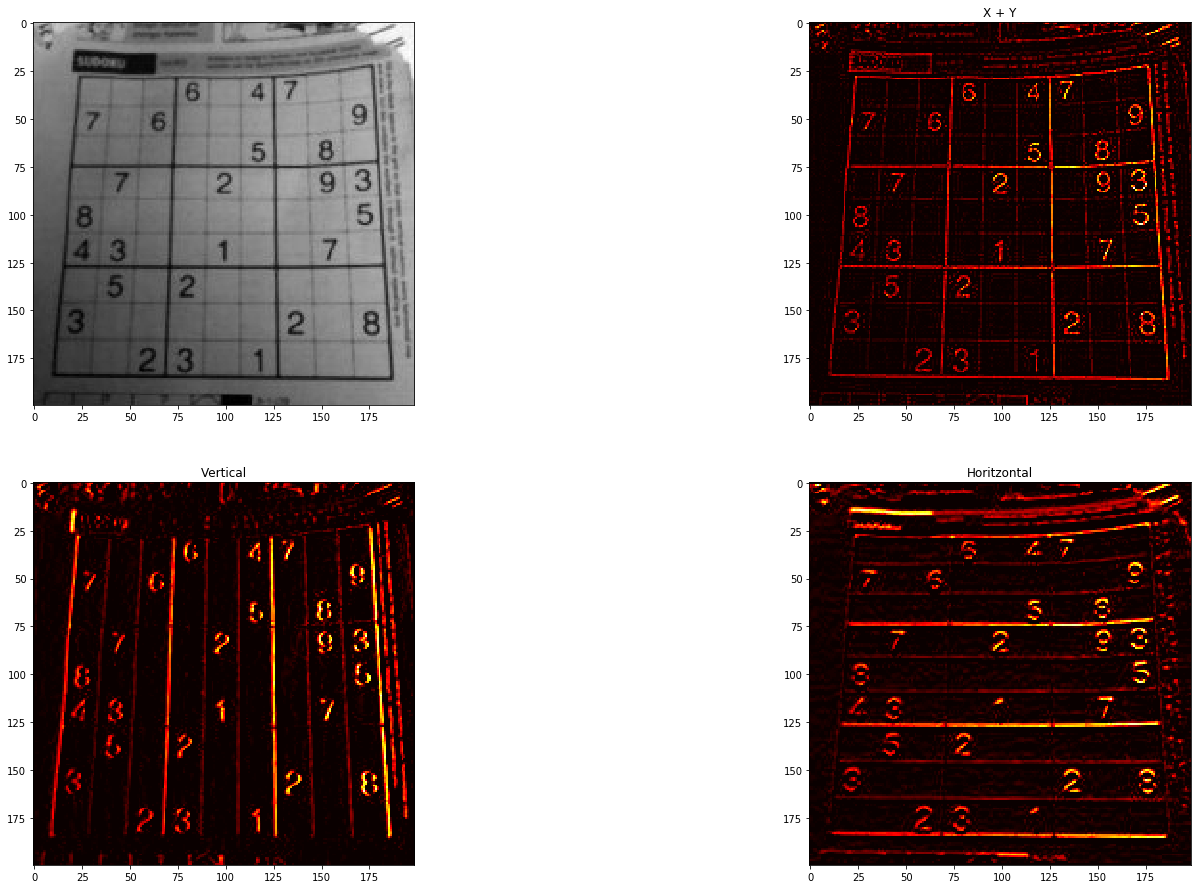

In [5]:
# EXERCICI: Detecció de contorns amb diferents matrius de convolució

import cv2
import numpy as np
from matplotlib import pyplot as plt

im = cv2.imread('Imatges/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

# creem un kernel per detectar contorns en direcció horitzontal i vertical
kernel = np.array([ [0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])
dst = cv2.filter2D(im,-1,kernel)

plt.subplot(2,2,1)
plt.imshow(im, cmap='gray')
plt.subplot(2,2,2)
plt.title('X + Y')
plt.imshow(dst, cmap='hot')

# creem un kernel per detectar contorns en direcció vertical
kernel = np.array([ [1, 0, -1]])
dst = cv2.filter2D(im,-1,kernel)
plt.subplot(2,2,3)
plt.title('Vertical')
plt.imshow(dst, cmap='hot')

# creem un kernel per detectar contorns en direcció horitzontal
kernel = np.array([ [1, 0, -1]])
dst = cv2.filter2D(im,-1,kernel.transpose())
plt.subplot(2,2,4)
plt.title('Horitzontal')
plt.imshow(dst, cmap='hot')


fig = plt.gcf()
fig.set_size_inches(25.5, 15.5)



## Mètode de Canny

El **mètode Canny** és un dels algoritmes més populars per a la detecció de contorns. Està basat en derivades per trobar aquells píxels on el canvi de gradient i intensitat és màxima. És per aquesta raó que l’algoritme és molt influenciable al soroll i necessita aplicar prèviament algun mètode de reducció del mateix com el filtre Gaussià que suavitza la imatge.

MIREIA: Explicar canny com a mètode més refinat per a detectar contorns

De vegades, és molt difícil obtenir el valor adequat d'un paràmetre d'un algoritme. Per això, les OpenCV disposen de barres de selecció interactives que es poden afegir a finestres amb imatges. D'aquesta manera, podem crear interfaces interactives per a escollir els millors paràmetres possibles. 

Anem a veure això per a escollir els millors valors per processar una imatge


In [6]:
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

im = cv2.imread('Imatges/coins.jpg', cv2.IMREAD_GRAYSCALE)

# per detectar les monedes, podem fer servir un detector de contorns com Canny:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html


@interact
def canny_parameters(lower=range(0, 255, 10), upper=range(0, 255, 10), sobel=[3,5,7]):
    edges = cv2.Canny(im, lower, upper, apertureSize=sobel)
    plt.subplot(1,2,1)
    plt.imshow(im, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(edges, cmap='gray')
    fig = plt.gcf()
    fig.set_size_inches(25.5, 15.5)
    return lower


interactive(children=(Dropdown(description='lower', options=(0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, …

Quadrats trobats: 36


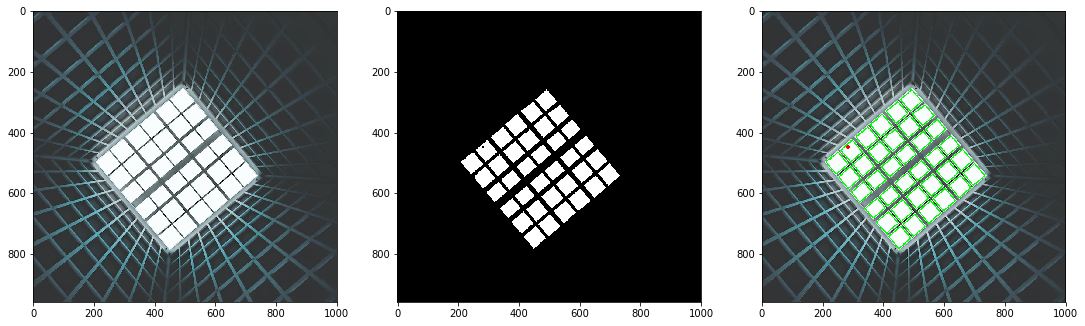

In [3]:
# EXEMPLE PRÀCTIC: Com detectar elements amb binarització i obtenir els seus contorns?
import cv2
import numpy as np
import matplotlib.pyplot as plt

# llegim la imatge, la convertim a BN i apliquem un llindar
im = cv2.imread('Imatges/Sostre.jpg')
im_bn = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
_, im_t = cv2.threshold(im_bn, 220, 255, cv2.THRESH_BINARY)

# eliminem petits píxels aillats (soroll)
kernel = np.ones((5,5),np.uint8)
im_t = cv2.erode(im_t,kernel,iterations = 1)

# trobem els contorns
_, contorns, _ = cv2.findContours(im_t,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# eliminem els més petits
quadrats = []
for c in contorns:
    # print(cv2.contourArea(c))
    if 2000 < cv2.contourArea(c):
        quadrats.append(c)

# mostrem tots els contorns trobats en vermell
img_contorns = cv2.drawContours(im.copy(), contorns, -1, (255,0,), 3)
# mostrem els contorns corresponents als quadrats en verd
img_contorns = cv2.drawContours(img_contorns, quadrats, -1, (0,255,0), 3)

print('Quadrats trobats: {}'.format(len(quadrats)))

# mostrem els resultats
plt.subplot(1,3,1)
plt.imshow(im)
plt.subplot(1,3,2)
plt.imshow(im_t, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img_contorns)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


Si ens fixem amb l’exemple anterior, veurem que hem aplicat un procés de 5 passos, cadascun dels quals tenia una sortida de dades (un resultat) que era l’entrada del següent pas:

![](Imatges/Proces_deteccio_contorns.jpg)

Aquest procés és bastant comú d’utilitzar, independentment del mètode de detecció de contorns o característiques que vulguem aplicar.

## Característiques dels Contorns
Igual que hem vist amb els Blobs, moltes vegades no en tenim prou amb detectar els contorns, també necessitem saber de quin objecte es tracta, o pot ser alguna característica principal per detectar aquells objectes o regions de la imatge que realment són del nostre interès. Aquí és on podem aplicar les característiques i propietats dels contorns. N’hi ha molts, i no els veurem tots en aquest curs (podreu trobar diversos tutorials a la documentació de l’OpenCV), però sí que en volem destacar alguns d’ells.

Característiques dels Contorns: 
- Moments: àrea de la massa o objecte, centre de massa, orientació
- Àrea del Contorn
- Perímetre del contorn
- Aproximació del contorn (a una altra forma amb menys vèrtexs)

Propietats dels Contorns:
- Ràtio d’aspecte (amplada vs alçada)
- Ràtio d’extensió (relació entre àrea del contorn vs àrea rectangle que el delimita)
- Solidesa (relació entre la superfície del contorn i la mínima capsa convexa que el delimita) → convex hull area
- Orientació
- Valors màxims i mínims
- Valors promig del color i la intensitat
- Punts extrems


In [16]:
#EXEMPLE PRÀCTIC: DETECCIÓ D'ALGUNA CARACTERÍSTICA I PROPIETAT DELS CONTORNS

## Referències

- Contours : Getting Started: [https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html)
- Valverde-Rebaza, Jorge. (2007). Detección de bordes mediante el algoritmo de Canny.: [https://www.researchgate.net/publication/267240432_Deteccion_de_bordes_mediante_el_algoritmo_de_Canny](https://www.researchgate.net/publication/267240432_Deteccion_de_bordes_mediante_el_algoritmo_de_Canny)
- Canny Edge Detection Step by Step in Python — Computer Vision, by Sofiane Sahir: [https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123](https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123)

